### Import and inspect data

In [126]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv('../project_data/complaints_1.csv')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date received                 162421 non-null  object 
 1   Product                       162421 non-null  object 
 2   Sub-product                   162421 non-null  object 
 3   Issue                         162421 non-null  object 
 4   Sub-issue                     162421 non-null  object 
 5   Consumer complaint narrative  162421 non-null  object 
 6   Company public response       162421 non-null  object 
 7   Company                       162421 non-null  object 
 8   State                         162421 non-null  object 
 9   ZIP code                      162421 non-null  object 
 10  Tags                          162421 non-null  object 
 11  Consumer consent provided?    162421 non-null  object 
 12  Submitted via                 162421 non-nul

In [129]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,7/15/2020,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"-- -- -- -- -- 1. ) XXXX XXXX, XXXX a purchase...",None,CAPITAL ONE FINANCIAL CORPORATION,FL,None,None,Consent provided,Web,7/15/2020,Closed with monetary relief,Yes,NaN,3745924
1,6/18/2020,Credit card or prepaid card,Store credit card,Trouble using your card,Credit card company won't increase or decrease...,-- -- -- -- -- Forwarded message -- -- -- -- -...,None,Alliance Data Card Services,MD,212XX,None,Consent provided,Web,6/18/2020,Closed with non-monetary relief,Yes,NaN,3705859
2,4/26/2020,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,-- -- - Forwarded Message -- -- - From : XXXX ...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,910XX,None,Consent provided,Web,4/26/2020,Closed with monetary relief,Yes,NaN,3624519
3,11/10/2020,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,"-- -- - XXXX, XXXX, XX/XX/2020 Payment Histori...",Company has responded to the consumer and the ...,Specialized Loan Servicing Holdings LLC,CA,None,None,Consent provided,Web,11/10/2020,Closed with explanation,Yes,NaN,3945441
4,11/10/2020,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,"-- -- - XXXX, XXXX, XX/XX/2020 Payment Histori...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,None,None,Consent provided,Web,11/10/2020,Closed with explanation,Yes,NaN,3945445


### Isolate relevant columns

In [130]:
df = df[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative']]

In [131]:
df = df.rename(columns={"Product": "product", "Sub-product": "subproduct", "Issue": "issue", "Sub-issue": "subissue", "Consumer complaint narrative": "narrative"})

In [132]:
df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    91179
Debt collection                                                                 23150
Credit card or prepaid card                                                     15566
Mortgage                                                                        11626
Checking or savings account                                                      8934
Money transfer, virtual currency, or money service                               4602
Vehicle loan or lease                                                            3524
Payday loan, title loan, or personal loan                                        1979
Student loan                                                                     1861
Name: product, dtype: int64

In [133]:
df['subproduct'].value_counts()

Credit reporting                              90041
General-purpose credit card or charge card    11097
Conventional home mortgage                     7411
Checking account                               7239
Other debt                                     6566
Credit card debt                               5241
I do not know                                  4836
Medical debt                                   3861
Loan                                           2896
Store credit card                              2284
FHA mortgage                                   1887
Mobile or digital wallet                       1782
Government benefit card                        1377
Domestic (US) money transfer                   1352
Federal student loan servicing                 1194
VA mortgage                                    1133
Auto debt                                       979
Installment loan                                882
Other personal consumer report                  828
Other bankin

In [134]:
df['issue'].value_counts()

Incorrect information on your report                                                54347
Problem with a credit reporting company's investigation into an existing problem    30084
Attempts to collect debt not owed                                                   11489
Trouble during payment process                                                       5407
Improper use of your report                                                          5220
                                                                                    ...  
Incorrect exchange rate                                                                 4
Property was damaged or destroyed property                                              3
Was approved for a loan, but didn't receive money                                       2
Problem with an overdraft                                                               1
Property was sold                                                                       1
Name: issu

In [135]:
df['subissue'].value_counts()

Information belongs to someone else                            33331
None                                                           19753
Their investigation did not fix an error on your report        14294
Account status incorrect                                        7952
Account information incorrect                                   7116
                                                               ...  
Problem with renewal                                               4
Problem with a check written from your prepaid card account        3
Problem with fees or penalties                                     2
Threatened to turn you in to immigration or deport you             2
Qualified for a better loan than the one offered                   1
Name: subissue, Length: 162, dtype: int64

In [136]:
df['issue'].value_counts().head(10)

Incorrect information on your report                                                54347
Problem with a credit reporting company's investigation into an existing problem    30084
Attempts to collect debt not owed                                                   11489
Trouble during payment process                                                       5407
Improper use of your report                                                          5220
Managing an account                                                                  5059
Written notification about debt                                                      4543
Problem with a purchase shown on your statement                                      4023
False statements or representation                                                   2642
Applying for a mortgage or refinancing an existing mortgage                          2268
Name: issue, dtype: int64

In [137]:
df['subissue'].value_counts().head(10)

Information belongs to someone else                         33331
None                                                        19753
Their investigation did not fix an error on your report     14294
Account status incorrect                                     7952
Account information incorrect                                7116
Was not notified of investigation status or results          6645
Investigation took more than 30 days                         5953
Debt is not yours                                            5602
Credit inquiries on your report that you don't recognize     3688
Debt was result of identity theft                            2989
Name: subissue, dtype: int64

In [138]:
print(f"products: {df['product'].nunique()}")
print(f"subproducts: {df['subproduct'].nunique()}")
print(f"issues: {df['issue'].nunique()}")
print(f"subissues: {df['subissue'].nunique()}")

products: 9
subproducts: 48
issues: 80
subissues: 162


Except for 'product', it doesn't seem there's enough data to train on. Maybe I could do subproduct, too, but I'd want to eliminate those with the lower value counts.

Note for subproduct, a high number is "I don't know." I could maybe classify those. 

In 'subissue', the second highest is 'None'. Also, there seems to be a lot of overlap between the categories, finer points that some consumers may not make. Example: "Debt is not yours" vs. "Debt was result of identity theft".

# Prepare Text

## Remove Stopwords

In [139]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import string

In [140]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

Try just the first one

In [141]:
print(df.iloc[0])
text = df['narrative'][0]
text

product                             Credit card or prepaid card
subproduct           General-purpose credit card or charge card
issue           Problem with a purchase shown on your statement
subissue      Credit card company isn't resolving a dispute ...
narrative     -- -- -- -- -- 1. ) XXXX XXXX, XXXX a purchase...
Name: 0, dtype: object


'-- -- -- -- -- 1. ) XXXX XXXX, XXXX a purchase with EIO.com ( order # XXXX ) with 2 day shipping for the amount of {$57.00}. \n\n-- -- -- -- -- -2. ) Did not receive the product after a week, so I sent a followup email ; with the exact verbiage : " I paid for two days shipping and have not received my order \'\' on XXXX XXXX. \n\n-- -- -- -- -- 3. ) Company Responded on on XXXX XXXX : " Im sorry to inform you that due to unusually high order volume, your order has not shipped and XXXX not be for several weeks. XXXX has been out of stock since early XXXX due to high demand, although they are continuing to take orders and guaranteeing that we will receive orders we place with them in due time. As such we have masks on order but we do not have an exact shipping date from XXXX right now, however we can guarantee we will ship as soon as soon as XXXX delivers product to us. We have been getting small shipments and shipping those on a first come, first served basis, so we appreciate your pat

In [142]:
def process_narrative(narrative):
    tokens = nltk.word_tokenize(narrative)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed  

In [143]:
text_words = process_narrative(text)
text_words[0:10]

['--', '--', '--', '--', '--', '1', 'xxxx', 'xxxx', 'xxxx', 'purchase']

In [144]:
# Create dictionary of word counts
word_counts = {}
for i in range(len(text_words)):
    word_counts[text_words[i]] = text_words.count(text_words[i])
word_counts

{'--': 53,
 '1': 1,
 'xxxx': 52,
 'purchase': 5,
 'eio.com': 1,
 'order': 10,
 '2': 2,
 'day': 1,
 'shipping': 5,
 'amount': 4,
 '57.00': 6,
 '-2': 1,
 'receive': 2,
 'product': 2,
 'week': 1,
 'sent': 2,
 'followup': 1,
 'email': 2,
 'exact': 2,
 'verbiage': 1,
 'paid': 1,
 'two': 1,
 'days': 1,
 'received': 1,
 '3': 1,
 'company': 1,
 'responded': 1,
 'im': 1,
 'sorry': 1,
 'inform': 1,
 'due': 3,
 'unusually': 1,
 'high': 2,
 'volume': 1,
 'shipped': 1,
 'several': 1,
 'weeks': 1,
 'stock': 2,
 'since': 1,
 'early': 1,
 'demand': 1,
 'although': 1,
 'continuing': 1,
 'take': 1,
 'orders': 3,
 'guaranteeing': 1,
 'place': 2,
 'time': 1,
 'masks': 1,
 'date': 1,
 'right': 1,
 'however': 1,
 'guarantee': 1,
 'ship': 1,
 'soon': 2,
 'delivers': 1,
 'us': 2,
 'getting': 1,
 'small': 1,
 'shipments': 1,
 'first': 2,
 'come': 1,
 'served': 1,
 'basis': 1,
 'appreciate': 1,
 'patience': 1,
 'fulfill': 1,
 'quickly': 1,
 'recommend': 1,
 'keeping': 1,
 'lose': 1,
 'line': 1,
 'cancel': 3,
 '

In [145]:
stopwords_list += ['--', 'xxxx']

In [146]:
def process_narrative(narrative):
    tokens = nltk.word_tokenize(narrative)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed  

text_words = process_narrative(text)

word_counts = {}
for i in range(len(text_words)):
    word_counts[text_words[i]] = text_words.count(text_words[i])
word_counts

{'1': 1,
 'purchase': 5,
 'eio.com': 1,
 'order': 10,
 '2': 2,
 'day': 1,
 'shipping': 5,
 'amount': 4,
 '57.00': 6,
 '-2': 1,
 'receive': 2,
 'product': 2,
 'week': 1,
 'sent': 2,
 'followup': 1,
 'email': 2,
 'exact': 2,
 'verbiage': 1,
 'paid': 1,
 'two': 1,
 'days': 1,
 'received': 1,
 '3': 1,
 'company': 1,
 'responded': 1,
 'im': 1,
 'sorry': 1,
 'inform': 1,
 'due': 3,
 'unusually': 1,
 'high': 2,
 'volume': 1,
 'shipped': 1,
 'several': 1,
 'weeks': 1,
 'stock': 2,
 'since': 1,
 'early': 1,
 'demand': 1,
 'although': 1,
 'continuing': 1,
 'take': 1,
 'orders': 3,
 'guaranteeing': 1,
 'place': 2,
 'time': 1,
 'masks': 1,
 'date': 1,
 'right': 1,
 'however': 1,
 'guarantee': 1,
 'ship': 1,
 'soon': 2,
 'delivers': 1,
 'us': 2,
 'getting': 1,
 'small': 1,
 'shipments': 1,
 'first': 2,
 'come': 1,
 'served': 1,
 'basis': 1,
 'appreciate': 1,
 'patience': 1,
 'fulfill': 1,
 'quickly': 1,
 'recommend': 1,
 'keeping': 1,
 'lose': 1,
 'line': 1,
 'cancel': 3,
 'distributor': 1,
 'momen

It seems there are a lot of numbers. Create a function to get rid of numbers from the list.  

Note: this function also gets rid of strings with punctuation in it like 'xx/xx/xxxx' or "n't".

In [147]:
def only_alpha(list):
    new_list = [word for word in list if word.isalpha()]
    return new_list

In [148]:
text_words = only_alpha(text_words)

Create function to make dictionary of word counts

In [153]:
def create_word_count_dict(list):
    word_counts = {}
    for i in range(len(list)):
        word_counts[list[i]] = list.count(list[i])
        
    # This line to sort the dictionary actually makes it a list of tuples
    word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
    return word_counts

In [154]:
create_word_count_dict(text_words)

[('order', 10),
 ('purchase', 5),
 ('shipping', 5),
 ('purchased', 5),
 ('amount', 4),
 ('canceled', 4),
 ('called', 4),
 ('transaction', 4),
 ('case', 4),
 ('due', 3),
 ('orders', 3),
 ('cancel', 3),
 ('refund', 3),
 ('stated', 3),
 ('posted', 3),
 ('appears', 3),
 ('statement', 3),
 ('capital', 3),
 ('one', 3),
 ('receive', 2),
 ('product', 2),
 ('sent', 2),
 ('email', 2),
 ('exact', 2),
 ('high', 2),
 ('stock', 2),
 ('place', 2),
 ('soon', 2),
 ('us', 2),
 ('first', 2),
 ('requested', 2),
 ('refunded', 2),
 ('visa', 2),
 ('submitted', 2),
 ('back', 2),
 ('dispute', 2),
 ('rebillmerchandiserobert', 2),
 ('ca', 2),
 ('thu', 2),
 ('rebill', 2),
 ('manager', 2),
 ('ruled', 2),
 ('favor', 2),
 ('removed', 2),
 ('j', 2),
 ('day', 1),
 ('week', 1),
 ('followup', 1),
 ('verbiage', 1),
 ('paid', 1),
 ('two', 1),
 ('days', 1),
 ('received', 1),
 ('company', 1),
 ('responded', 1),
 ('im', 1),
 ('sorry', 1),
 ('inform', 1),
 ('unusually', 1),
 ('volume', 1),
 ('shipped', 1),
 ('several', 1),
 (

I think FreqDist will do the same thing.

In [155]:
from nltk import FreqDist

In [156]:
FreqDist(text_words)

FreqDist({'order': 10, 'purchase': 5, 'shipping': 5, 'purchased': 5, 'amount': 4, 'canceled': 4, 'called': 4, 'transaction': 4, 'case': 4, 'due': 3, ...})

In [157]:
type(FreqDist(text_words))

nltk.probability.FreqDist

Yes, but it's a weird data type.

In [159]:
FreqDist(text_words).most_common(10)

[('order', 10),
 ('purchase', 5),
 ('shipping', 5),
 ('purchased', 5),
 ('amount', 4),
 ('canceled', 4),
 ('called', 4),
 ('transaction', 4),
 ('case', 4),
 ('due', 3)]

Note how calling `most_common()` also creates a list of tuples.

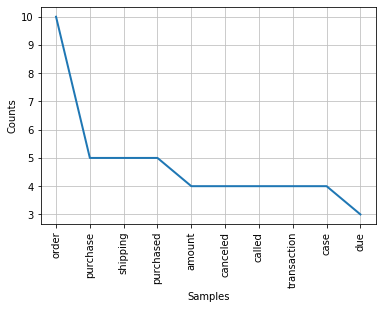

In [166]:
FreqDist(text_words).plot(10)

### Let's try it for the next entries

#### df.iloc[1]

In [178]:
df.iloc[1][0:4]

product                             Credit card or prepaid card
subproduct                                    Store credit card
issue                                   Trouble using your card
subissue      Credit card company won't increase or decrease...
Name: 1, dtype: object

In [167]:
text = df['narrative'][1]
text

'-- -- -- -- -- Forwarded message -- -- -- -- - From : XXXX XXXX XXXX Date : Tue, XX/XX/XXXXat XXXX XXXX Subject : Please Investigate Comenity Bank Retailers card scam To : XXXX Sent from my XXXX Hello my name is XXXX XXXX, I am being scammed by Comenity bank a credit card provider for companies The Childrens place, New York & Co. , Forever 21 and Victoria Secret. My original credit from XXXX was {$500.00} Comenity bank then lowers my limit to {$300.00} and began to charge overage fees along with late fees. I then began to pay close attention to my other cards to find that my limits were also changed on them as well incurring overages and late fees. \nI reached out to the company Comenity bank they stated that they would change my credit limit to its original limits but did not. I reached out to them again and told them I will not summit any payment until my accounts are corrected. Comenity bank credit cards has impacted my credit scores plummeted to a negative status. Im currently pay

In [169]:
text_words = process_narrative(text)

In [170]:
text_words = only_alpha(text_words)

In [171]:
FreqDist(text_words).most_common(30)

[('credit', 7),
 ('fees', 6),
 ('comenity', 5),
 ('bank', 5),
 ('company', 4),
 ('late', 3),
 ('limits', 3),
 ('im', 3),
 ('card', 2),
 ('name', 2),
 ('original', 2),
 ('limit', 2),
 ('began', 2),
 ('overage', 2),
 ('cards', 2),
 ('well', 2),
 ('reached', 2),
 ('accounts', 2),
 ('due', 2),
 ('forwarded', 1),
 ('message', 1),
 ('date', 1),
 ('tue', 1),
 ('subject', 1),
 ('please', 1),
 ('investigate', 1),
 ('retailers', 1),
 ('scam', 1),
 ('sent', 1),
 ('hello', 1)]

#### df.iloc[2]

In [177]:
df.iloc[2][0:4]

product             Checking or savings account
subproduct                     Checking account
issue                       Managing an account
subissue      Problem using a debit or ATM card
Name: 2, dtype: object

In [172]:
text = df['narrative'][2]
text_words = process_narrative(text)
text_words = only_alpha(text_words)
FreqDist(text_words).most_common(30)

[('wells', 7),
 ('fargo', 7),
 ('clearly', 5),
 ('fraudulent', 5),
 ('account', 4),
 ('legal', 3),
 ('agencies', 3),
 ('branch', 3),
 ('cards', 3),
 ('damages', 3),
 ('small', 3),
 ('claims', 3),
 ('lawsuit', 3),
 ('payment', 2),
 ('actually', 2),
 ('court', 2),
 ('charges', 2),
 ('debit', 2),
 ('required', 2),
 ('take', 2),
 ('business', 2),
 ('consumer', 2),
 ('protection', 2),
 ('immediately', 2),
 ('also', 2),
 ('punitive', 2),
 ('conduct', 2),
 ('forwarded', 1),
 ('message', 1),
 ('cc', 1)]

In [173]:
df.iloc[2]

product                             Checking or savings account
subproduct                                     Checking account
issue                                       Managing an account
subissue                      Problem using a debit or ATM card
narrative     -- -- - Forwarded Message -- -- - From : XXXX ...
Name: 2, dtype: object